# Grupo: Douglas Ferreira, Luis Souza.

In [1]:
import random
import string
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tamanho_pop = 30
prob_crossover = 1
prob_mutacao = 0.3
alvo = "METHINKS*IT*IS*LIKE*A*WEASEL"
tamanhostring = len(alvo)

A probabilidade de uma string com o mesmo número de caracteres da string alvo gerada aleatoriamente ser igual à string alvo é igual a $(\frac{1}{a+b+c})^{28}$ , onde a = total de letras do alfabeto, b = total de dígitos, c = asterisco, que representa o espaço, e a potência 28 corresponde ao número de caracteres da string alvo. Ou seja, a chance é de  $(\frac{1}{26+10+1})^{28}$ = $(\frac{1}{37})^{28}$, já que é necessário escolher um caractere certo entre 37 possíveis 28 vezes.

 O algoritmo genético supera essa probabilidade incrivelmente pequena fazendo combinações das soluções que mais se aproximam da solução alvo até chegar nas condições desejadas de parada, o que torna mais fácil chegar a uma solução mais "adaptada" ao problema.



# Calcula a dimensão do espaço de busca:
O tamanho do espaço de busca é um arranjo com repetição $AR_{n,p} = n^p$. Sendo n =  quantidade de caracteres no conjunto  e p = quantidade de caracteres por arranjo

In [3]:
def tamanho_espaco(n, p):
  espaco = float(pow(n,p))
  probabilidade = 1/espaco
  return espaco, probabilidade


In [4]:
tamanho, prob = tamanho_espaco(37,tamanhostring)

# Qual é o tamanho do espaço de busca?

# Qual a probabilidade da string gerada ser exatamente igual a string alvo?

In [5]:

print("O tamanho do espaço de busca é: ",tamanho )
print(" A probabilidade da string gerada ser exatamente igual a string alvo é: ",prob )

O tamanho do espaço de busca é:  8.121724880277123e+43
 A probabilidade da string gerada ser exatamente igual a string alvo é:  1.231265543638901e-44


# Cria população inicial com 20 indivíduos, cada indivíduo possui 28 caracteres incluindo o alfabeto de maiúsculas de A-Z, nomeros de 0-9 e espaços. 

In [6]:
def init_population(tamanhopopulacao: int= tamanho_pop):
  population = []
  for i in range (tamanhopopulacao):
        x = ''.join(random.choice(string.ascii_uppercase + '*' + string.digits) for i in range(tamanhostring))
        population.append(x)
  return population



# Função fitness que retorna a quantidade de caracteres pareados entre a solução candidata e a solução alvo

In [7]:
def fitness(sol_candidata):
  aptidao = 0
  for i in range(len(sol_candidata)):
    if(sol_candidata[i] == alvo[i]):
      aptidao+=1           
  return aptidao
  #Retorna a quantidade de caracteres da string gerada  iguais ao da string alvo


# Realiza crossover com dois pontos de corte  com uma determinada probabilidade

In [8]:
 #Com uma probabilidade igual a prob_crossover é feito o cruzamento entre dois pais
def crossover(pais, prob_crosover:float = prob_crossover):
  if(random.random() > prob_crosover):
    return pais[0], pais[1]#Se um número é gerado aleatoriamente é maior que a prob_crossover, então, os pais retornam para a população é não acontece o cruzamento
  else:
    filho1 = ''
    filho2 = ''
    pontos_corte = [10,10]# Esses pontos de corte são definidos dessa forma para que o fluxo entre no while a seguir
    while((pontos_corte[0] == pontos_corte[1])or(pontos_corte[0]>=pontos_corte[1])):#Essa condição garante que o primeiro ponto de corte é diferente 
    #do segundo e que o primeiro acontece antes do segundo, a lógica a seguir depende dessas premissas verdadeiras.
    #Esse laço é executado enquanto os dois pontos de corte forem iguais ou enquanto o segundo ponto de corte for menor que o primeiro
      pontos_corte = np.random.randint(0, tamanhostring, size=(2))
    filho1 = pais[0][0:pontos_corte[0]] + pais[1][pontos_corte[0]:pontos_corte[1]] + pais[0][(-(len(pais[0]) - pontos_corte[1])):]
    filho2 = pais[1][0:pontos_corte[0]] + pais[0][pontos_corte[0]:pontos_corte[1]] + pais[1][(-(len(pais[0]) - pontos_corte[1])):]
    return filho1, filho2#Retorna os filhos, resultado do cruzamento

# Realiza mutacao de um caracter com uma determinada probabilidade

In [9]:
  #Com uma probabilidade igual a prob_mutação é feita uma mutação em um indivíduo
  def mutacao(individuo, prob_mutacao):
      #Se um número gerado aleatoriamente é maior que a prob de mutação é retornado o indivíduo sem mutação
    if(random.random() > prob_mutacao):
        return individuo
        #Retorna indivíduo sem mutação
        #Se o número gerado é menor ou igual a probabilidade de mutação, é feita a mutação no indivíduo
    else:
      posicao_mut = np.random.randint(0,tamanhostring)# Gera um número entre 0 e o tamanho da string para ser a posição onde a mutação ocorrerá
      caracter_substituto = ''.join(random.choice(string.ascii_uppercase + '*' + string.digits))# Gera um caractere entre os possíveis
      listaaux = list(individuo)
      listaaux[posicao_mut] = caracter_substituto
      individuo = "".join(listaaux)
      return individuo #Retorna o indivíduo com mutação


In [10]:
def pais(population):
  #seleciona 5 aleatoriamente e pega os 2 melhores dentre os 5
  listaaleatoria = list(range(1,tamanho_pop)) 
  random.shuffle(listaaleatoria)
  cincoaleatorios = []
  for i in range(5):
    cincoaleatorios.append(population[listaaleatoria[i]]) 

  valoresfitness = []
  for i in range(5):
    valoresfitness.append(fitness(cincoaleatorios[i]))
  #Retorna os índices dos dois melhores individuos, que serão os pais
  K = 2
  doismelhores = sorted(range(len(valoresfitness)), key = lambda x: valoresfitness[x], reverse=True)[:K]
  pai1, pai2 = cincoaleatorios[doismelhores[0]], cincoaleatorios[doismelhores[1]]
  return pai1, pai2

In [11]:
#Função que remove o pior indivíduo da população
def remocao (population):
  aux2 = 0
  min = 100
  for x in range (len(population)):
    aux=fitness(population[x]) 
    if (aux <= min):
      min=aux
      aux2=x
  return aux2

In [12]:
def evolucao (tamanho_string: int = tamanhostring, n:int=8, tamanho_pop:int=30, iteracoes:int=30000):
  pop = init_population(tamanho_pop) #inicializa a pop
  pop_fitness = [fitness(each_solution) for each_solution in pop]  #fitness dos individuos
  media = [np.mean(pop_fitness)] #media do fitness
  maximo = [max(pop_fitness)] #menor fitness
  geracoes = 0
  
  while (max(maximo)<tamanhostring):  #condicao de parada
    pai1, pai2 = pais(pop) #escolhe os pais
    filho1, filho2 = crossover([pai1,pai2], prob_crossover) #gera os filhos cruzando dois pais
    filho1 = mutacao(filho1, prob_mutacao)
    filho2 = mutacao(filho2, prob_mutacao)
    pop.append(filho1) #adiciona os filhos à população
    pop.append(filho2)
    aux2 = remocao(pop)
    pop.pop(aux2)  #remove primeiro individuo
    aux2 = remocao(pop)
    pop.pop(aux2)  #remove segundo individuo
    pop_fitness = [fitness(each_solution) for each_solution in pop]
    geracoes+=1
    maximo.append(max(pop_fitness)) 
    media.append(np.mean(pop_fitness))
    print(pop[-1])#Imprime o melhor indivíduo da geração
  return pop, maximo, media, geracoes

In [13]:
def plotar(valores, maximos, medias):
 
    iteracoes = range(len(maximos))
 
    fig, ax = plt.subplots( dpi=120 )
    ax.plot(iteracoes, maximos, 'y.', label='Melhor fitness')
    ax.plot(iteracoes, medias, 'k.', label='Média dos fitness')
    ax.set_xlabel('Gerações')
    ax.set_ylabel('Fitness')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('\nNº de fitness em cada geração.') 
    plt.show()

# Testando o algoritmo com probabilidade de crossover  =1 e probabilidade de mutação = 0.3

A saída de streaming foi truncada nas últimas 5000 linhas.
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINHSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSNIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METQINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSNIT*ISFLIKE*A*WEAGEL
METTINJSNIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*ISFLIKE*A*WEAGEL
METTINJSFIT*I

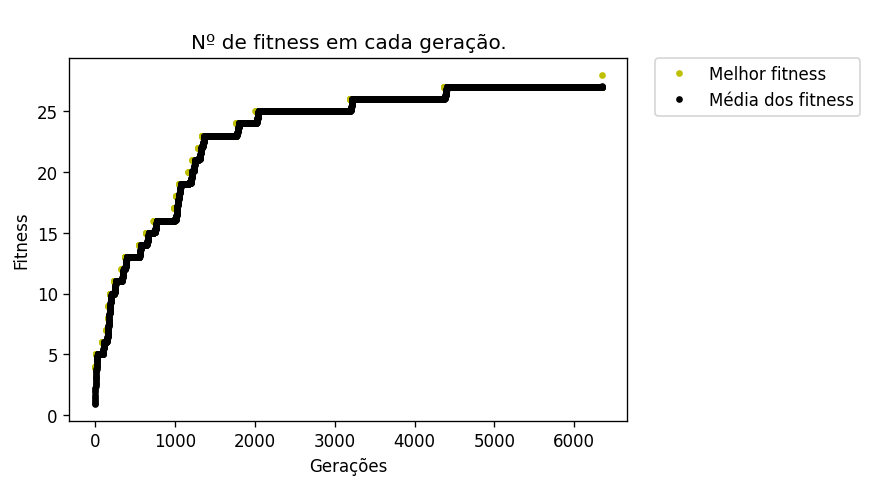

In [14]:

pop, maximo, media, geracoes = evolucao(tamanhostring)
plotar(pop, maximo, media)

#Redefinindo as probabilidade de crossover e mutação para .8 e 0.05, respectivamente

In [15]:
prob_crossover = .8
prob_mutacao = 0.05

# Calculando a evolução para as novas probabilidades

A saída de streaming foi truncada nas últimas 5000 linhas.
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*IS*LIKE*A*WEASEL
METHIN0S*IT*I

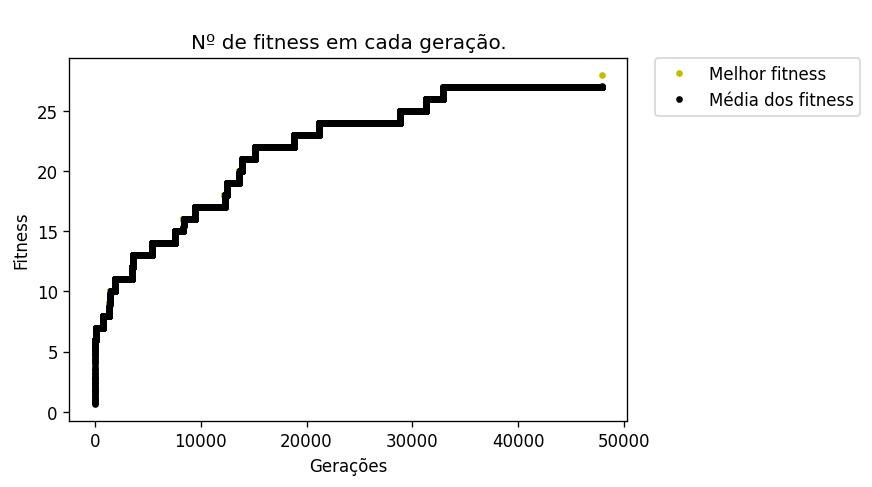

In [16]:
pop, maximo, media, geracoes = evolucao(tamanhostring)
plotar(pop, maximo, media)

# Redefinindo as probabilidade de crossover e mutação para 1 e 0.02, respectivamente

In [17]:
prob_crossover = 1
prob_mutacao = 0.05

# Calculando a evolução para as novas probabilidades

A saída de streaming foi truncada nas últimas 5000 linhas.
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*IS*LIKE*A*WEASEL
MWTHINKS*IT*I

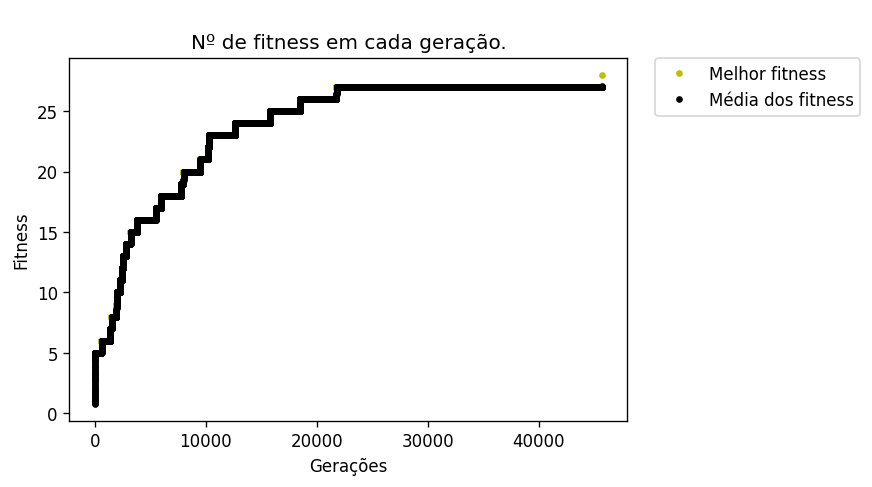

In [18]:
pop, maximo, media, geracoes = evolucao(tamanhostring)
plotar(pop, maximo, media)

# Redefinindo as probabilidade de crossover e mutação para .5 e 0.3, respectivamente

In [19]:
prob_crossover = .5
prob_mutacao = 0.3

# Calculando a evolução para as novas probabilidades

N4CNQV065HT9KPLBZWAE*YTFRKO7
0JJ124RYOEDDZZ62RKELBCQOQF2*
N4CNQV06*QI7MJPK2Z*MML7FRRO7
EKFGIN4O9ULH45UR6GUGTE4743EP
0JJ124RYOZDDZZ62RKELBCQOQF2*
1*QSMJ8C*QI7MJPK2Z*MML7E3X4V
ST21S1WDRGQSBXR1VFY5GHYEJSLI
6TTNKN483*U05GQUNGVWV9CUNLUA
OGTNKN483*U0EMY4LN7B24KI15ZO
OGTNKN483*U0EMYHJM7B24KI15ZO
OGTNKN483*U0EMY4LN7B24KI15ZO
6TTNKN483*U05GQUNGVWV9CUNLUA
ST21S1WDRGQSBJPK2Z*MML7EJSLI
6TTNKN483*U05EQUNGELBCQOQFUA
OGTNKN483*U0EGQUNGVWV9CI15ZO
ST21S1WDRGQS5GQUNGY5GHYEJSLI
ST21S1WDRGQS5GQUNGY5GHYEJSLI
ST21S1WDRGQS5GQUNGY5GHYEJSLI
ST21S1WDRGQS5GQUNGY5GHYEJSLI
6TTNKJ8C*QI7MJPK2Z*MML7E364A
6TTNKN4DRGQSBXRUNGELBCQOQFUA
6TTNKN4DRGQSBXRUNGELBCQOQFUA
6TTNKN4DRGQSBXRUNGELBCQOQFUA
6TTNKN4DRGQSBXRUNGELBCQOQFUA
6TTNKN4DRGQSBXRUNGELBCQOQFUA
6TTNKN4DRGQSBXRUNGELBCQOQFUA
EKTNKN4D9ULH45UR6GUGTE4743EP
EKTNKN4D9ULH45UR6GUGTE4743EP
6TTNKN4DRGQSBXPK2Z*MML7E364A
6TTNKN4DRGQSBXRUNGELBC0OQFUA
6TTNKJ8C*QI7MJRUNXELBCQOQFUA
6TTNKN4DRGQSBXPK2Z*MMLPE364A
EKFGIN4O9ULH45UR6GUGTE4743EP
6TTNKN4DRGQSBXRUNGELBC0OQFUA
6TTNKJ8C*QI7MJ

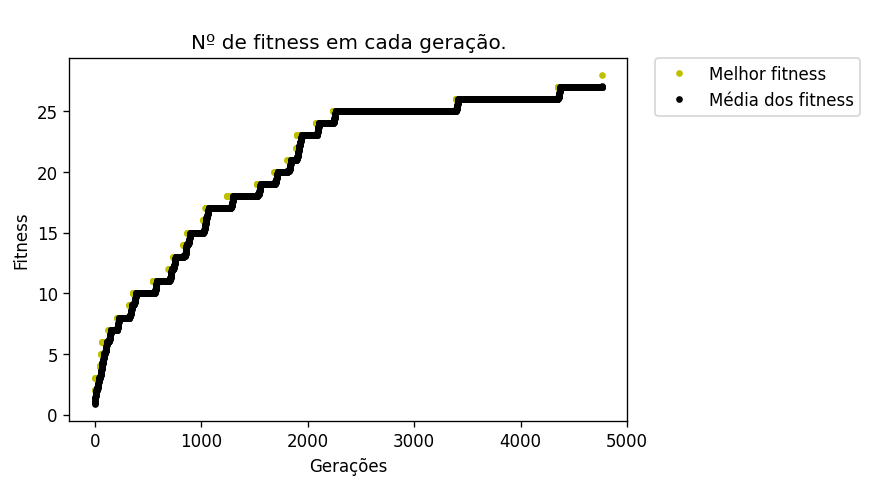

In [20]:
pop, maximo, media, geracoes = evolucao(tamanhostring)
plotar(pop, maximo, media)

# Redefinindo as probabilidade de crossover e mutação para .2 e 0.4, respectivamente

In [21]:
prob_crossover = .2
prob_mutacao = 0.4

# Calculando a evolução para as novas probabilidades

A saída de streaming foi truncada nas últimas 5000 linhas.
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*IV*LIKE*H*WEASEL
MEVHINES*PT*I

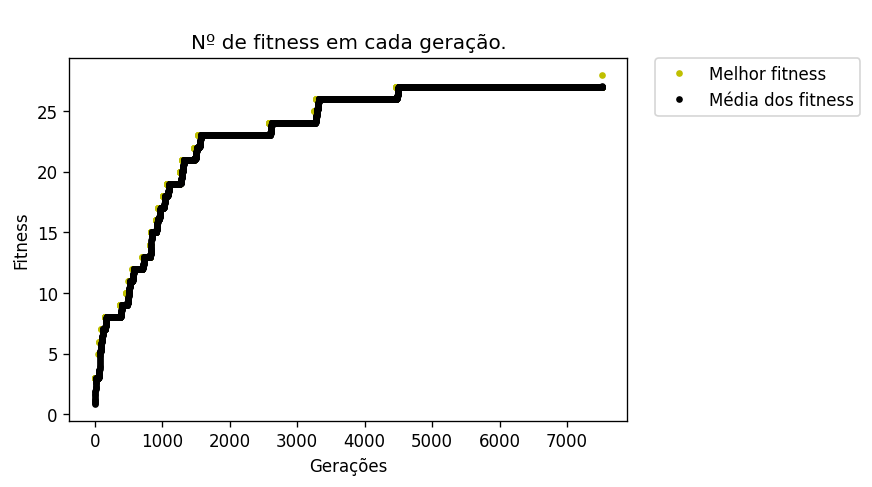

In [22]:
pop, maximo, media, geracoes = evolucao(tamanhostring)
plotar(pop, maximo, media)

# Percebe-se, que para esse problema da string especificamente, a convergência depende bastante da probabilidade de mutação, por outro lado a probabilidade de crossover não influencia tanto no resultado como a probabilidade de mutação. O algoritmo demora muito a convergir com taxas de mutação abaixo de 0.1. Enquanto que a redução da probabilidade de cruzamento, não afeta igualmente o resultado. 

# As probabilidades de crossover e mutação são redefinidas para os valores iniciais do início desse notebook

In [23]:
prob_crossover = 1
prob_mutacao = 0.3

# A seguir o algoritmo será calculado 10 vezes é será tirada uma média do números de gerações necessárias para a convergência da solução 

In [24]:
numero_total_geracoes = 0
for i in range(10):  
  pop, maximo, media, geracoes = evolucao(tamanhostring)
  numero_total_geracoes += geracoes
media_total_geracoes = numero_total_geracoes/10

A saída de streaming foi truncada nas últimas 5000 linhas.
GEDHOBIJ13PAIS*7YSU6ADZL9SEL
GEDHZBIJ13*AIS*ZISU6GDZL9SEL
GEDHZBIJ13JAIS*ZISU6GDZ19SEL
GEDHZBIJ13*AIS*ZISU6GDZL9SEL
GEDHZBDJ13*AIS*7YSU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6GDZ99SEL
GEDHZBIJ13*AIS*7YSU6ADZL9SEL
GEDHZBIJ13PAIS*ZISU6GDZ99SEL
GEDHZBIJ13PAIS*ZISU6ADZ19SEL
GEDHZBDJ13*AIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZ19SEL
GEDHZBIJ13JAIS*ZISU6ADZL9SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBDJ13*AIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBDJ13*AIS*ZISU6ADZ99SEL
GEDHZBIA13JAIS*ZIKU6GDZL9SEL
GEDHZBDJ13*AIS*ZIKU6GDZ99SEL
GEDHZBIJ13JAIS*ZIKU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZD9SEL
GEDHZBIJ13JAIS*ZIKU6ADZL9SEL
GEDHZBIJ13JAIS*ZISU6ADZ19SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBDJ13*AIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBIJ13JAIS*ZIKU6ADZL9SEL
GE6HZBIJ13JAIS*ZISU6ADZ99SEL
GEDHZBIJ1EJAIS*ZIKU6ADZL9SEL
GEDHZBIJ1EJAIS*ZIKU6ADZL9SEL
GEDHZBIJ13JAIS*ZIKU6ADZL9SEL
GEDHZBIJ13JAI

In [25]:
print("O número médio de gerações necessárias para a convergência da string", alvo, "é igual a ",media_total_geracoes)

O número médio de gerações necessárias para a convergência da string METHINKS*IT*IS*LIKE*A*WEASEL é igual a  6489.9


# Aqui uma nova string é definida, para fins de teste

In [26]:
alvo = "E*MELHOR*MORRER*DO*QUE*PERDER*A*VIDA"#Define uma nova string
tamanhostring = len(alvo)#Define o tamanho da nova string

In [27]:
numero_total_geracoes = 0
for i in range(10):  
  pop, maximo, media, geracoes = evolucao(tamanhostring)
  numero_total_geracoes += geracoes
media_total_geracoes = numero_total_geracoes/10


A saída de streaming foi truncada nas últimas 5000 linhas.
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*DO*QUE*PERTER*A*V2DA
E*MELHOR*MORR2R*

In [28]:
print("O número médio de gerações necessárias para a convergência da string", alvo, "é igual a ",media_total_geracoes)

O número médio de gerações necessárias para a convergência da string E*MELHOR*MORRER*DO*QUE*PERDER*A*VIDA é igual a  9283.0
